## Bag of Words(BoW)

### Basic

In [1]:
from konlpy.tag import Okt

okt = Okt()

def build_bag_of_words(document):
    document = document.replace('.', '')
    tokenized_document = okt.morphs(document)
    
    word_to_index = {}
    bow = []
    
    for word in tokenized_document:        
        if word not in word_to_index.keys():  # 단어가 처음 나왔을 경우
            word_to_index[word] = len(word_to_index)  
            bow.insert(len(word_to_index) - 1, 1)
        else:                                 # 단어가 다시 나왔을 경우
            index = word_to_index.get(word)
            print(word, type(word_to_index))
            bow[index] = bow[index] + 1
                    
    return word_to_index, bow
    
    
doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
vocab, bow = build_bag_of_words(doc1)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

가 <class 'dict'>
물가상승률 <class 'dict'>
vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector : [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


In [2]:
doc2 = '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.'

vocab, bow = build_bag_of_words(doc2)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

을 <class 'dict'>
vocabulary : {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bag of words vector : [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


In [3]:
doc3 = doc1 + ' ' + doc2
vocab, bow = build_bag_of_words(doc3)

print('vocabulary :', vocab)
print('bag of words vector :', bow)

가 <class 'dict'>
물가상승률 <class 'dict'>
소비자 <class 'dict'>
하는 <class 'dict'>
물가상승률 <class 'dict'>
을 <class 'dict'>
vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bag of words vector : [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


### BOW-CountVectorizer 

In [4]:
# CountVectorizer : 띄어쓰기만으로 토큰화 진행
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

# 빈도수 기록
print('bag of words vector :', vector.fit_transform(corpus).toarray()) 

# 단어의 인덱스
print('vocabulary :',vector.vocabulary_)

bag of words vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


### BOW-불용어 제거(사용자 정의 불용어)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [6]:
# 사용자정의 불용어 적용
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])

print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


### BOW-불용어 제거(CountVectorizer 포함된 불용어)

In [7]:
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")

print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1]]
vocabulary : {'family': 0, 'important': 1, 'thing': 2}


### BOW-불용어 제거(NLTK 포함된 불용어)

In [8]:
text = ["Family is not an important thing. It's everything."]
stop_words = stopwords.words("english")

vect = CountVectorizer(stop_words=stop_words)
print('bag of words vector :',vect.fit_transform(text).toarray()) 
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


## 문서 단어 행렬(Document-Term Matrix, DTM)

### 데이터 다운로드

In [9]:
# colab : wget -c https://raw.githubusercontent.com/euphoris/datasets/master/imdb.xlsx

In [10]:
# !pip install wget

In [11]:
# windows일 경우
# import wget

# wget.download('https://raw.githubusercontent.com/euphoris/datasets/master/imdb.xlsx')

### 데이터 열기

In [12]:
import pandas as pd

df = pd.read_excel('./data/imdb.xlsx', index_col=0)

In [13]:
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [14]:
df.shape

(748, 2)

### TDM 만들기

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# max_features : 빈도순으로 최대 500단어까지 포함
# stop_words='english' : 불용어(관사, 전치사등을 제거)
cv = CountVectorizer(max_features=500, stop_words='english')

In [16]:
tdm = cv.fit_transform(df['review'])
tdm

<748x500 sparse matrix of type '<class 'numpy.int64'>'
	with 3434 stored elements in Compressed Sparse Row format>

In [17]:
tdm.shape

(748, 500)

### 단어 목록

In [18]:
# 단어 목록을 볼때는 tdm이 아니라 cv에 저장되어 있음
cv.get_feature_names()[:10]

c:\Users\TAEYONG\anaconda3\envs\study\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['10',
 '20',
 '90',
 'absolutely',
 'acted',
 'acting',
 'action',
 'actor',
 'actors',
 'actress']

In [19]:
len(cv.get_feature_names())

500

### 단어별 총 빈도

In [20]:
tdm.sum(axis=0) # 열별 단어 수 

matrix([[ 29,   3,   6,   9,   3,  43,   7,  10,  19,   3,   3,  10,   3,
           4,   3,   4,   9,   3,   3,   3,   6,   3,   4,   3,  13,   4,
           3,   5,   3,   8,   5,   3,  14,  71,   4,  11,   4,   6,   8,
          25,  18,  10,   5,  10,   4,   3,   4,  10,   3,   3,   6,   7,
           3,   4,  10,   5,   3,  18,   6,   8,  24,  35,   4,   3,   7,
           3,   4,   5,   8,  10,   6,   5,   5,   7,   4,   3,   3,   5,
           3,   3,   4,   4,   7,   4,   5,   3,   4,   6,   4,   3,   5,
           4,   3,   5,   4,   3,   9,   3,   4,   3,  13,  11,  22,   5,
           3,   9,   5,  12,   6,   3,   9,  12,  26,   4,  10,   3,   3,
           3,   3,   4,   4,   3,   6,   3,   9,  11,  11,   4,   5,   3,
           9,   4,   6,   3,   8,   3,   3,  16,   4,   7,   4,   4,   5,
           8,   5,   7,   5,   7,   5,   3,   3,  10,   5, 163,  24,   3,
           3,   5,   6,   4,   5,  19,   3,   9,   3,   7,   5,   3,   4,
           3,   6,   3,   7,   3,   6,

In [21]:
tdm.sum(axis=1) # 행별 단어 수 

matrix([[  5],
        [  5],
        [ 12],
        [  3],
        [  6],
        [  7],
        [  2],
        [  7],
        [  2],
        [  2],
        [  1],
        [  4],
        [  3],
        [  1],
        [  5],
        [  5],
        [  6],
        [ 10],
        [  3],
        [229],
        [  5],
        [  2],
        [  5],
        [  3],
        [  1],
        [  2],
        [  4],
        [  2],
        [  7],
        [  3],
        [  1],
        [  0],
        [  1],
        [  3],
        [  4],
        [  6],
        [  3],
        [  6],
        [ 11],
        [  3],
        [  4],
        [  3],
        [  2],
        [  0],
        [  0],
        [  6],
        [  4],
        [  3],
        [  1],
        [  8],
        [  5],
        [  5],
        [  2],
        [  2],
        [  4],
        [  5],
        [  5],
        [  1],
        [  2],
        [  4],
        [  3],
        [  4],
        [  0],
        [  1],
        [  2],
        [  3],
        [ 

In [22]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

In [23]:
type(tdm.sum(axis=0))

numpy.matrix

In [24]:
word_count

,단어,빈도
0,10,29
1,20,3
2,90,6
3,absolutely,9
4,acted,3
...,...,...
495,wrong,3
496,year,5
497,years,14
498,yes,3


In [25]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
284,movie,182
153,film,163
33,bad,71
225,just,63
178,good,58


### 단어 빈도 저장

In [26]:
word_count.to_csv('./data/word_count.csv')

## 단어 구름(wordcloud)

### wordcloud 설치

In [27]:
#아나콘다를 이용할 경우:
# !conda install -y -c conda-forge wordcloud

#맥 또는 리눅스에서는 pip 명령어로 설치
# !pip install wordcloud

In [28]:
# !pip install wordcloud

### 데이터 불러오기

In [29]:
import pandas as pd

word_count = pd.read_csv('./data/word_count.csv', index_col=0)
word_count.head()

,단어,빈도
0,10,29
1,20,3
2,90,6
3,absolutely,9
4,acted,3


### 단어 구름

In [30]:
from wordcloud import WordCloud

#font_path: 글꼴의 경로
#max_words: 워드클라우드를 그릴 단어의 개수
#background_color: 배경색 설정
#width : 가로크기(픽셀 단위)
#height: 세로크기(픽셀 단위)
#배경은 흰색, 최대 100단어를 가로 400픽셀, 세로 300픽셀 크기로 단어 구름으로 그린다.
wc = WordCloud(background_color='white', max_words=100, width=400, height=300)

In [31]:
word_count.set_index('단어')

,빈도
단어,
10,29
20,3
90,6
absolutely,9
acted,3
...,...
wrong,3
year,5
years,14


In [32]:
word_count.set_index('단어')['빈도']

단어
10            29
20             3
90             6
absolutely     9
acted          3
              ..
wrong          3
year           5
years         14
yes            3
young          4
Name: 빈도, Length: 500, dtype: int64

In [33]:
# dictionary로 만드는 방법1
count_dic = word_count.set_index('단어')['빈도'].to_dict()

count_dic

{'10': 29,
 '20': 3,
 '90': 6,
 'absolutely': 9,
 'acted': 3,
 'acting': 43,
 'action': 7,
 'actor': 10,
 'actors': 19,
 'actress': 3,
 'actresses': 3,
 'actually': 10,
 'addition': 3,
 'adorable': 4,
 'aerial': 3,
 'age': 4,
 'amazing': 9,
 'angel': 3,
 'animation': 3,
 'anne': 3,
 'annoying': 6,
 'appearance': 3,
 'appreciate': 4,
 'aren': 3,
 'art': 13,
 'attempt': 4,
 'attention': 3,
 'audience': 5,
 'average': 3,
 'avoid': 8,
 'away': 5,
 'awesome': 3,
 'awful': 14,
 'bad': 71,
 'barely': 4,
 'beautiful': 11,
 'beginning': 4,
 'believable': 6,
 'believe': 8,
 'best': 25,
 'better': 18,
 'big': 10,
 'bit': 5,
 'black': 10,
 'book': 4,
 'bore': 3,
 'bored': 4,
 'boring': 10,
 'bought': 3,
 'brilliance': 3,
 'brilliant': 6,
 'budget': 7,
 'called': 3,
 'came': 4,
 'camera': 10,
 'care': 5,
 'cartoon': 3,
 'cast': 18,
 'casting': 6,
 'certainly': 8,
 'character': 24,
 'characters': 35,
 'charles': 4,
 'charming': 3,
 'cheap': 7,
 'checking': 3,
 'chemistry': 4,
 'child': 5,
 'cinema':

In [34]:
# dictionary로 만드는 방법2
dict(zip(word_count['단어'], word_count['빈도']))

{'10': 29,
 '20': 3,
 '90': 6,
 'absolutely': 9,
 'acted': 3,
 'acting': 43,
 'action': 7,
 'actor': 10,
 'actors': 19,
 'actress': 3,
 'actresses': 3,
 'actually': 10,
 'addition': 3,
 'adorable': 4,
 'aerial': 3,
 'age': 4,
 'amazing': 9,
 'angel': 3,
 'animation': 3,
 'anne': 3,
 'annoying': 6,
 'appearance': 3,
 'appreciate': 4,
 'aren': 3,
 'art': 13,
 'attempt': 4,
 'attention': 3,
 'audience': 5,
 'average': 3,
 'avoid': 8,
 'away': 5,
 'awesome': 3,
 'awful': 14,
 'bad': 71,
 'barely': 4,
 'beautiful': 11,
 'beginning': 4,
 'believable': 6,
 'believe': 8,
 'best': 25,
 'better': 18,
 'big': 10,
 'bit': 5,
 'black': 10,
 'book': 4,
 'bore': 3,
 'bored': 4,
 'boring': 10,
 'bought': 3,
 'brilliance': 3,
 'brilliant': 6,
 'budget': 7,
 'called': 3,
 'came': 4,
 'camera': 10,
 'care': 5,
 'cartoon': 3,
 'cast': 18,
 'casting': 6,
 'certainly': 8,
 'character': 24,
 'characters': 35,
 'charles': 4,
 'charming': 3,
 'cheap': 7,
 'checking': 3,
 'chemistry': 4,
 'child': 5,
 'cinema':

In [35]:
cloud = wc.fit_words(count_dic)

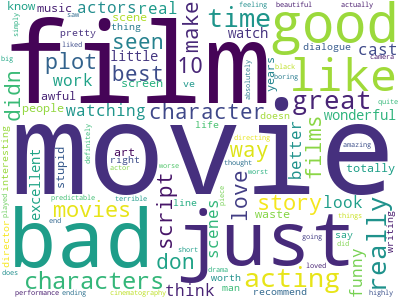

In [36]:
cloud.to_image()

In [37]:
cloud.to_file('cloud.png')

In [38]:
import os

os.getcwd()

'c:\\Users\\TAEYONG\\Desktop\\sesac\\머신러닝'

## TF-IDF

### 데이터 불러오기

In [1]:
import pandas as pd

df = pd.read_excel('./data/imdb.xlsx', index_col=0)
df.head()


,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


### TF-IDF

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=500, stop_words='english')

In [3]:
tdm = tfidf.fit_transform(df['review'])
tdm

<748x500 sparse matrix of type '<class 'numpy.float64'>'
	with 3434 stored elements in Compressed Sparse Row format>

In [4]:
print(tdm)

  (0, 264)	0.43676152065842583
  (0, 499)	0.5112421488050499
  (0, 284)	0.23148088751652843
  (0, 286)	0.5112421488050499
  (0, 385)	0.48261672511123166
  (1, 185)	0.4508252485652821
  (1, 27)	0.4630757536620436
  (1, 61)	0.330043211383874
  (1, 253)	0.4775650258680224
  (1, 417)	0.4952984618525245
  (2, 293)	0.3326996842333155
  (2, 242)	0.30667834544717537
  (2, 319)	0.24142314513946203
  (2, 321)	0.3140711939059074
  (2, 5)	0.22041303500891976
  (2, 354)	0.32260561111952785
  (2, 108)	0.3140711939059074
  (2, 54)	0.2890474338764623
  (2, 71)	0.32260561111952785
  (2, 475)	0.30015739096222105
  (2, 43)	0.2943241984036562
  (2, 284)	0.15064019733663225
  (3, 394)	0.6747516922530598
  (3, 287)	0.5316526285937699
  (3, 244)	0.5119137000618044
  :	:
  (739, 146)	1.0
  (740, 9)	0.83021432552157
  (740, 182)	0.5574443234070687
  (741, 250)	0.6167137686897145
  (741, 481)	0.4797072301038725
  (741, 405)	0.4694360111750707
  (741, 239)	0.41130880407139175
  (742, 284)	1.0
  (743, 46)	0.59810

In [5]:
word_count = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    'tf-idf': tdm.sum(axis=0).flat
})
word_count.sort_values('tf-idf',ascending=False).head()

c:\Users\TAEYONG\anaconda3\envs\study\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,단어,tf-idf
284,movie,44.917213
153,film,40.356390
33,bad,25.258572
225,just,20.296871
178,good,18.604656


## 기존 TDM에서 변환

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=500, stop_words='english')
tdm2 = cv.fit_transform(df['review'])

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer

trans = TfidfTransformer()
tdm3 = trans.fit_transform(tdm2)
tdm3

<748x500 sparse matrix of type '<class 'numpy.float64'>'
	with 3434 stored elements in Compressed Sparse Row format>

In [8]:
# tf-idf 두 방법 비교
import numpy as np

np.allclose(tdm.A, tdm3.A)

True

In [9]:
wc2 = pd.DataFrame({
    '단어': cv.get_feature_names(),
    'tf-idf': tdm3.sum(axis=0).flat
})

wc2.sort_values('tf-idf', ascending=False).head()

c:\Users\TAEYONG\anaconda3\envs\study\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,단어,tf-idf
284,movie,44.917213
153,film,40.356390
33,bad,25.258572
225,just,20.296871
178,good,18.604656


## 영어품사 태깅 & 표제어 추출

In [10]:
# !conda install -y -c conda-forge spacy

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\TAEYONG\anaconda3\envs\study

  added / updated specs:
    - spacy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    catalogue-2.0.8            |  py310h5588dad_1          33 KB  conda-forge
    click-8.0.4                |  py310h5588dad_0         150 KB  conda-forge
    colorama-0.4.6             |     pyhd8ed1ab_0          25 KB  conda-forge
    cymem-2.0.6                |  py310hd77b12b_0          34 KB
    cython-blis-0.7.8          |  py310h2873277_0         5.6 MB  conda-forge
    dataclasses-0.8            |     pyhc8e2a94_3          10 KB  conda-forge
    langcodes-3.3.0            |     pyhd8ed1ab_0         156 KB  conda-forge
    murmurhash-1.0.7           |  py310hd77b12b_0          24 KB
    pathy-0.6.2                |     pyhd8ed1ab_0          38 KB  conda-forge
    preshed-3.0.6

In [11]:
# !python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 7.1 MB/s eta 0:00:00
     -------------------------------------- 126.0/126.0 kB 7.2 MB/s eta 0:00:00
     ---------------------------------------- 58.6/58.6 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: smart-open
    Found existing installation: smart-open 6.2.0
    Uninstalling smart-open-6.2.0:
      Successfully uninstalled smart-open-6.2.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.9.0
    Uninstalling pydantic-1.9.0:
      Successfully uninstalled pydantic-1.9.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-10-28 09:43:53.249062: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-10-28 09:43:53.249557: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [21]:
# !pip install -U spacy

In [5]:
# !pip uninstall wasabi -y
# !pip install wasabi==0.9.1

  Using cached wasabi-0.9.1-py3-none-any.whl (26 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.1.5 requires blis<0.8.0,>=0.7.8, but you have blis 0.7.7 which is incompatible.
spacy 3.4.2 requires spacy-legacy<3.1.0,>=3.0.10, but you have spacy-legacy 3.0.9 which is incompatible.
en-core-web-sm 3.3.0 requires spacy<3.4.0,>=3.3.0.dev0, but you have spacy 3.4.2 which is incompatible.


In [1]:
import spacy   # spacy를 불러온다

nlp = spacy.load('en_core_web_sm')  # 영어 모형을 불러온다

# 모형에 영어 테스트 적용
text = "Wikipedia is maintained by volunteers."
doc = nlp(text)

ImportError: blis.cy does not export expected C function sgemm

In [ ]:
for token in doc:
    print(token.text,
          token.lemma_,  # 표제어
          token.pos_,    # 단어의 품사
          token.tag_,    # 자세한 품사
          token.dep_,    # 문법적 의존 관계
          token.is_stop) # 불용어 여부

In [ ]:
spacy.explain('PROPN')

In [ ]:
# 명사와 동사의 표제어만 추출하는 함수를 만든다.
def extract_nv(text):
    doc = nlp(text)
    words = []
    for token in doc:
        print(token.tag_)
        if token.tag_[0] in 'NV':
            words.append(token.lemma_.lower())
    return words

In [ ]:
extract_nv('Apple is a company')

In [ ]:
# CountVectorizer를 초기화한다
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=500, tokenizer=extract_nv)

In [ ]:
# 데이터를 불러온다.
import pandas as pd
df = pd.read_excel('imdb.xlsx', index_col=0)
df.head()

In [ ]:
# TDM을 만든다.
tdm = cv.fit_transform(df['review'])

In [ ]:
# 빈도 순으로 정렬한다
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})
wc.sort_values('빈도', ascending=False).head()